In [ ]:
!git clone https://github.com/vis-nlp/ChartQA.git
%cd ChartQA
!pip install transformers==4.25.1 datasets==2.2.2 nltk accelerate
!pip install pandas==1.5.3 numpy==1.23.5

Cloning into 'ChartQA'...
remote: Enumerating objects: 42010, done.
remote: Counting objects: 100% (260/260), done.
remote: Compressing objects: 100% (211/211), done.
remote: Total 42010 (delta 55), reused 49 (delta 49), pack-reused 41750 (from 1)
Receiving objects: 100% (42010/42010), 811.38 MiB | 17.13 MiB/s, done.
Resolving deltas: 100% (120/120), done.
Updating files: 100% (41865/41865), done.
/content/ChartQA
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 kB 7.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 133.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.8/346.8 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 135.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
cd ChartQA/

/content/ChartQA


In [ ]:
!unzip ChartQA_data_json.zip -d data2/


Archive:  ChartQA_data_json.zip
   creating: data2/content/ChartQA/data/
   creating: data2/content/ChartQA/data/val/
   creating: data2/content/ChartQA/data/val/.ipynb_checkpoints/
   creating: data2/content/ChartQA/data/val/features/
  inflating: data2/content/ChartQA/data/val/features/multi_col_100631.json  
  inflating: data2/content/ChartQA/data/val/features/two_col_23297.json  
  inflating: data2/content/ChartQA/data/val/features/11756.json  
  inflating: data2/content/ChartQA/data/val/features/86672159001758.json  
  inflating: data2/content/ChartQA/data/val/features/multi_col_21042.json  
  inflating: data2/content/ChartQA/data/val/features/two_col_101211.json  
  inflating: data2/content/ChartQA/data/val/features/multi_col_40134.json  
  inflating: data2/content/ChartQA/data/val/features/two_col_40183.json  
  inflating: data2/content/ChartQA/data/val/features/two_col_21498.json  
  inflating: data2/content/ChartQA/data/val/features/multi_col_60574.json  
  inflating: data2/co

In [ ]:
import os
import json
import pandas as pd
import csv

def build_t5_csv(json_path, table_dir, output_csv):
    with open(json_path, 'r') as f:
        data = json.load(f)

    with open(output_csv, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=['Input', 'Output', 'Image Index', 'Question ID'])
        writer.writeheader()

        for i, item in enumerate(data):
            table_id = item['imgname'].replace('.png', '')
            table_path = os.path.join(table_dir, f'{table_id}.csv')

            if not os.path.exists(table_path):
                print(f"Missing table for {table_id}")
                continue

            df = pd.read_csv(table_path)
            table_str = ' | '.join(df.columns) + ' & '
            for _, row in df.iterrows():
                row_str = ' | '.join([str(v) for v in row])
                table_str += row_str + ' & '
            table_str = table_str.strip(' & ')

            input_text = f"Question: {item['query']} Table: {table_str}"
            question_id = f"{table_id}_{i}"

            writer.writerow({
                'Input': input_text,
                'Output': item['label'],
                'Image Index': table_id,
                'Question ID': question_id
            })


build_t5_csv('ChartQA Dataset/train/train_augmented.json',
             'ChartQA Dataset/train/tables', 'data2/content/ChartQA/data/train/data.csv')
build_t5_csv('ChartQA Dataset/val/val_augmented.json', 'ChartQA Dataset/val/tables', 'data2/content/ChartQA/data/val/data.csv')
build_t5_csv('ChartQA Dataset/test/test_augmented.json', 'ChartQA Dataset/test/tables', 'data2/content/ChartQA/data/test/data.csv')

In [ ]:
pip uninstall tensorflow jax jaxlib -y


Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
Found existing installation: jax 0.5.2
Uninstalling jax-0.5.2:
  Successfully uninstalled jax-0.5.2
Found existing installation: jaxlib 0.5.1
Uninstalling jaxlib-0.5.1:
  Successfully uninstalled jaxlib-0.5.1


In [ ]:
pip install protobuf==3.20.3


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 14.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, which is not installed.
orbax-checkpoint 0.11.12 requires jax>=0.5.0, which is not installed.
flax 0.10.5 requires jax>=0.5.1, which is not installed.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 3.20.3 which is incompatible.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.3 which is incompatible.
bigframes 2.1.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
tensorflow-metadata 1.17.1 requires protobuf<6.0.0,>=4.25.2; python_vers

In [ ]:
import torch

print("CUDA Available:", torch.cuda.is_available())

if torch.cuda.is_available():
    print("CUDA Device Count:", torch.cuda.device_count())
    print("CUDA Device Name:", torch.cuda.get_device_name(0))
    print("Current CUDA Device:", torch.cuda.current_device())
else:
    print("No CUDA device available. Using CPU.")


✅ CUDA Available: True
🖥 CUDA Device Count: 1
🚀 CUDA Device Name: NVIDIA A100-SXM4-40GB
💡 Current CUDA Device: 0


In [ ]:
!bash Models/VL-T5/scripts/VQA_VLT5.sh 1

W0425 00:29:28.633000 99851 torch/distributed/elastic/agent/server/api.py:719] Received 2 death signal, shutting down workers
W0425 00:29:28.633000 99851 torch/distributed/elastic/multiprocessing/api.py:897] Sending process 99870 closing signal SIGINT
Traceback (most recent call last):
  File "/content/ChartQA/Models/VL-T5/src/vqa.py", line 2, in <module>
    from trainer_base import TrainerBase
  File "/content/ChartQA/Models/VL-T5/src/trainer_base.py", line 19, in <module>
    import wandb
  File "/usr/local/lib/python3.11/dist-packages/wandb/__init__.py", line 22, in <module>
    from wandb.sdk.lib import wb_logging as _wb_logging
  File "/usr/local/lib/python3.11/dist-packages/wandb/sdk/__init__.py", line 25, in <module>
    from .artifacts.artifact import Artifact
  File "/usr/local/lib/python3.11/dist-packages/wandb/sdk/artifacts/artifact.py", line 29, in <module>
    from wandb.apis.normalize import normalize_exceptions
  File "/usr/local/lib/python3.11/dist-packages/wandb/apis/

Saved screenshot of training epochs

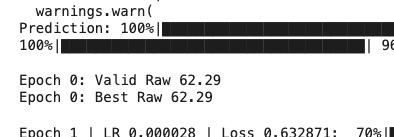

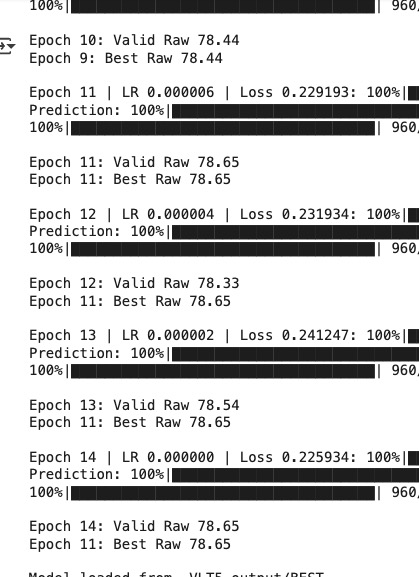

In [ ]:
!bash Models/VL-T5/scripts/VQA_VLT5_inference.sh 1

Configurations
{'RefCOCO_BUTD': False,
 'RefCOCO_GT': False,
 'adam_beta1': 0.9,
 'adam_beta2': 0.999,
 'adam_eps': 1e-06,
 'answer_normalize': False,
 'backbone': 't5-base',
 'batch_size': 256,
 'caption_cocoonly': True,
 'caption_only': False,
 'classifier': False,
 'clip_grad_norm': -1.0,
 'coco_only': False,
 'comment': '',
 'distributed': True,
 'do_lower_case': False,
 'dropout': 0.1,
 'dry': False,
 'epochs': 12,
 'feat_dim': 2048,
 'fp16': True,
 'from_scratch': False,
 'gen_max_length': 20,
 'gpu': 0,
 'gradient_accumulation_steps': 1,
 'ground_upsample': 1,
 'ground_weight': 1,
 'individual_vis_layer_norm': True,
 'itm_cocoonly': True,
 'load': 'VLT5_output/BEST',
 'local_rank': 0,
 'log_train_accuracy': False,
 'losses': 'lm,obj,attr,feat',
 'lr': 0.0001,
 'max_n_boxes': 36,
 'max_text_length': 20,
 'multiGPU': True,
 'multitask_sampling': 'roundrobin',
 'n_boxes': 36,
 'n_ground': 1,
 'no_prefix': False,
 'num_beams': 5,
 'num_workers': 8,
 'obj_mask_rate': 0.15,
 'optim': 

In [ ]:
import sys
sys.path.append('/content/ChartQA/Models/VL-T5/src')

In [ ]:
from vqa_data import VQAEvaluator
import json

with open('/content/ChartQA/predictions/predictions.json') as f:
    preds = json.load(f)

evaluator = VQAEvaluator('/content/ChartQA/data2/content/ChartQA/data/test/')

acc = evaluator.evaluate_raw(preds)
print(f"Test Raw Accuracy: {acc['overall']}%")


100%|██████████████████████████████████| 1250/1250 [00:00<00:00, 1652862.55it/s]

Test Raw Accuracy: 86.4%


Human labeled, questions only, no gold tables provided:

In [ ]:
!bash ChartQA/Models/VL-T5/scripts/VQA_VLT5.sh 1

Configurations
{'RefCOCO_BUTD': False,
 'RefCOCO_GT': False,
 'adam_beta1': 0.9,
 'adam_beta2': 0.999,
 'adam_eps': 1e-06,
 'answer_normalize': False,
 'backbone': 't5-base',
 'batch_size': 16,
 'caption_cocoonly': True,
 'caption_only': False,
 'classifier': False,
 'clip_grad_norm': 5.0,
 'coco_only': False,
 'comment': '',
 'distributed': True,
 'do_lower_case': False,
 'dropout': 0.1,
 'dry': False,
 'epochs': 10,
 'feat_dim': 2048,
 'fp16': True,
 'from_scratch': False,
 'gen_max_length': 20,
 'gpu': 0,
 'gradient_accumulation_steps': 1,
 'ground_upsample': 1,
 'ground_weight': 1,
 'individual_vis_layer_norm': True,
 'itm_cocoonly': True,
 'load': '/content/ChartQA/Epoch30',
 'local_rank': 0,
 'log_train_accuracy': False,
 'losses': 'lm,obj,attr,feat',
 'lr': 0.0001,
 'max_n_boxes': 36,
 'max_text_length': 20,
 'multiGPU': True,
 'multitask_sampling': 'roundrobin',
 'n_boxes': 36,
 'n_ground': 1,
 'no_prefix': False,
 'num_beams': 5,
 'num_workers': 16,
 'obj_mask_rate': 0.15,
 'o

In [ ]:
!bash ChartQA/Models/VL-T5/scripts/VQA_VLT5_inference.sh 1

Configurations
{'RefCOCO_BUTD': False,
 'RefCOCO_GT': False,
 'adam_beta1': 0.9,
 'adam_beta2': 0.999,
 'adam_eps': 1e-06,
 'answer_normalize': False,
 'backbone': 't5-base',
 'batch_size': 256,
 'caption_cocoonly': True,
 'caption_only': False,
 'classifier': False,
 'clip_grad_norm': -1.0,
 'coco_only': False,
 'comment': '',
 'distributed': True,
 'do_lower_case': False,
 'dropout': 0.1,
 'dry': False,
 'epochs': 12,
 'feat_dim': 2048,
 'fp16': True,
 'from_scratch': False,
 'gen_max_length': 20,
 'gpu': 0,
 'gradient_accumulation_steps': 1,
 'ground_upsample': 1,
 'ground_weight': 1,
 'individual_vis_layer_norm': True,
 'itm_cocoonly': True,
 'load': '/content/ChartQA/VLT5_onlyQ_output/BEST',
 'local_rank': 0,
 'log_train_accuracy': False,
 'losses': 'lm,obj,attr,feat',
 'lr': 0.0001,
 'max_n_boxes': 36,
 'max_text_length': 20,
 'multiGPU': True,
 'multitask_sampling': 'roundrobin',
 'n_boxes': 36,
 'n_ground': 1,
 'no_prefix': False,
 'num_beams': 5,
 'num_workers': 8,
 'obj_mask_

In [ ]:
import json
import pandas as pd

pred_path = "/content/ChartQA/onlyQ_predictions/predictions.json"
csv_path = "/content/ChartQA/data2/content/ChartQA/data/test/data.csv"

with open(pred_path, 'r') as f:
    predictions = json.load(f)

df = pd.read_csv(csv_path)
gt_dict = dict(zip(df["Question ID"].astype(str), df["Output"].astype(str)))
correct = 0
total = 0

for qid, pred in predictions.items():
    pred = str(pred).strip()
    gt = str(gt_dict.get(qid, "")).strip()

    if gt == pred:
        correct += 1
    total += 1

accuracy = correct / total if total > 0 else 0
print(f"Exact Match Accuracy (based on predictions.json): {accuracy:.4f} ({correct}/{total})")


Exact Match Accuracy (based on predictions.json): 0.0936 (117/1250)


In [ ]:
import json
import pandas as pd
import re

pred_path = "/content/ChartQA/onlyQ_predictions/predictions.json"
csv_path = "/content/ChartQA/data2/content/ChartQA/data/test/data.csv"

with open(pred_path, 'r') as f:
    predictions = json.load(f)

df = pd.read_csv(csv_path)
gt_dict = dict(zip(df["Question ID"].astype(str), df["Output"].astype(str)))

def relaxed_match(a, b):
    def normalize(text):
        if text is None:
            return ""
        text = str(text).strip().lower()
        text = re.sub(r'\s+', '', text)
        return text

    norm_a = normalize(a)
    norm_b = normalize(b)

    if norm_a == norm_b:
        return True

    try:
        return float(norm_a) == float(norm_b)
    except:
        return False

correct = 0
total = 0

for qid, pred in predictions.items():
    gt = gt_dict.get(qid, "")
    if relaxed_match(gt, pred):
        correct += 1
    total += 1

accuracy = correct / total if total > 0 else 0
print(f"Relaxed Match Accuracy (based on predictions.json): {accuracy:.4f} ({correct}/{total})")


Relaxed Match Accuracy (based on predictions.json): 0.0960 (120/1250)
